# Epicurious: kMeans (Unsupervised)
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
- k-Means takes data points as input and groups them into k clusters. 
- Uses the distance between points as a measure of similarity, based on k averages.
- This process of grouping is the training phase of the learning algorithm. 
- Train and test splits are only commonly used in supervised learning
- The result would be a model that takes a data sample as input and returns the cluster that the new data point belongs to, according to the training that the model went through.
- apply clusters to original data: https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

In [61]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [62]:
# load dataset
data = pd.read_csv('epicurious_data_cleaned_updated.csv')

# drop and re-order columns so cols 0-6 are features and 7 is the target (normalized_rating)
columns = ['calories',
 'fat',
 'protein',
 'sodium',
 'age',
 'ingredients_count',
 'tags_count',
 'rating_normalized']

data = data.reindex(columns=columns)

# split data into features array and target array
array = data.values
X = array[:,0:7]
Y = array[:,7]

np.random.seed(1)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
# sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
# with_mean, True by default, center the data before scaling.
# with_std, True by default, scale the data to unit variance.

# standardize the data
data = scale(X, with_mean=True, with_std=True)

n_samples, n_features = data.shape
n_digits = len(np.unique(Y))
labels = Y

### variables that change model performance

In [63]:
sample_size = 300 # used for generation of model performance statistics

# n_init: number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
n_init_plus = 10
n_init_random = 10
n_init_PCA = 1 # this by default should remain 1

featues = len(np.unique(Y)) # 7, the number of features in the dataset
n_digits_plus = featues
n_digits_random = featues
n_digits_PCA = featues

In [64]:
# function to find the metrics for each model
k_metrics = pd.DataFrame(['init','time','inertia','homo','compl','v-meas','ARI','AMI','silhouette'])

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    init = name
    print(init)
    k_metrics.append['init'] = init
    (time() - t0)
    estimator.inertia_
    metrics.homogeneity_score(labels, estimator.labels_)
    metrics.completeness_score(labels, estimator.labels_)
    metrics.v_measure_score(labels, estimator.labels_)
    metrics.adjusted_rand_score(labels, estimator.labels_)
    metrics.adjusted_mutual_info_score(labels,  estimator.labels_)
    metrics.silhouette_score(data, estimator.labels_,
                            metric='euclidean',
                            sample_size=sample_size)

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits_plus, n_init=n_init_plus),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits_random, n_init=n_init_random),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits_PCA, n_init=n_init_PCA),
              name="PCA-based",
              data=data)

k-means++


TypeError: 'method' object does not support item assignment

In [65]:
# euclidean: "ordinary" straight-line distance between two points, only option for kMeans
# homogeneity score (homo, 1.0 best): each cluster contains only members of a single class
# completeness score (compl, 1.0 best): all members of a given class are assigned to the same cluster
# V measure (v-meas, 1.0 best): harmonic mean of homo and compl
# adjusted Rand index (ARI, 1.0 best): measures the similarity of the two assignments
# adjusted mutual information (AMI, 1.0 Best): measures the agreement of the two assignments
# silhouette coefficient (silhouette, +1.0 Best): Scores around zero indicate overlapping clusters

In [66]:
k_metrics.head()

,0
0,init
1,time
2,inertia
3,homo
4,compl


In [67]:
(bench_k_means(KMeans(init='k-means++', n_clusters=n_digits_plus, n_init=n_init_plus),
              name="k-means++", data=data)

SyntaxError: unexpected EOF while parsing (<ipython-input-67-08d524e58ebe>, line 2)

In [68]:
# apply clusters to original data
# https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print df_tr[clmns].groupby(['clusters']).mean()

SyntaxError: invalid syntax (<ipython-input-68-dd937da2253c>, line 11)

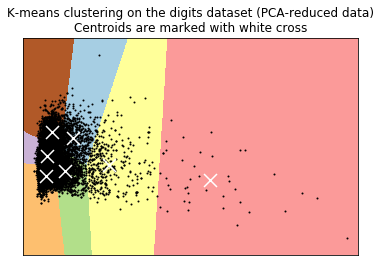

In [69]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

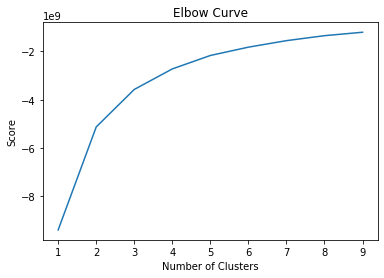

In [70]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# k Fold Cross Validation
- https://machinelearningmastery.com/k-fold-cross-validation/

In [71]:
# https://stackoverflow.com/questions/37842165/sklearn-calculating-accuracy-score-of-k-means-on-the-test-data-set

import pandas as ps
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test,y_train,y_test =  model_selection.train_test_split(X,Y,test_size=0.20,random_state=70)
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train)
print(k_means.labels_)
print(y_test)

score = metrics.accuracy_score(y_test,k_means.predict(X_test))
print('Accuracy:{0:f}'.format(score))

k_means.predict(X_test)
print(k_means.labels_)
print(y_test)

NameError: name 'cluster' is not defined

In [ ]:
#Implementation of K-Means Clustering
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green'])
z = plt.scatter(x.sepal_length, x.sepal_width, x.petal_length, c = colormap[model.labels_])